In [58]:
import torchvision 
from torchvision import transforms
from torch.utils.data import DataLoader
import torch as ch
import torch.nn as nn
import math
import matplotlib.pyplot as plt
import cox
from cox.utils import Parameters
import cox.store as store
from cox.readers import CollectionReader
import seaborn as sns
import os
import seaborn as sns
import matplotlib.pyplot as plt

# set environment variable so that stores can create output files
os.environ['HDF5_USE_FILE_LOCKING'] = 'FALSE'

TRUNC_CE_CONSTANT_LR = '/home/gridsan/stefanou/cifar-10/resnet-18/trunc_ce_constant_100epochs'
TRUNC_CE_CYCLIC = '/home/gridsan/stefanou/cifar-10/resnet-18/trunc_ce_cyclic_100epochs'
TRUNC_CE_COSINE = '/home/gridsan/stefanou/cifar-10/resnet-18/trunc_ce_cosine_100epochs'
TRUNC_CE_STEP_LR_REAL = '/home/gridsan/stefanou/cifar-10/resnet-18/trunc_ce_step_lr_real_200epochs'

CE_CONSTANT_LR = '/home/gridsan/stefanou/cifar-10/resnet-18/ce_constant_100epochs'
CE_CYCLIC = '/home/gridsan/stefanou/cifar-10/resnet-18/ce_cyclic_100epochs'
CE_COSINE = '/home/gridsan/stefanou/cifar-10/resnet-18/ce_cosine_100epochs'
CE_STEP_LR_REAL = '/home/gridsan/stefanou/cifar-10/resnet-18/ce_step_lr_real_200epochs'

TRUNC_CE_STEP_LR = '/home/gridsan/stefanou/cifar-10/resnet-18/trunc_ce_step_lr'
CE_STEP_LR = '/home/gridsan/stefanou/cifar-10/resnet-18/ce_step_lr'

LR = [5e-1, 3e-1, 2e-1, 1e-1, 1e-2]

In [51]:
def plot(ce_metadata, ce_logs, trunc_metadata, trunc_logs, type_):
    fig = plt.figure()
    fig.set_figheight(10)
    fig.set_figwidth(15)
    for i, lr in enumerate(LR):
        ce_exp_id = ce_metadata[ce_metadata['lr'] == lr]['exp_id']
        ce_exp_logs = ce_logs[ce_logs.exp_id.isin(ce_exp_id)]

        trunc_exp_id = trunc_metadata[trunc_metadata['lr'] == lr]['exp_id']
        trunc_exp_logs = trunc_logs[trunc_logs.exp_id.isin(trunc_exp_id)]

        fig.add_subplot(2, 5, i + 1)
        sns.lineplot(data=ce_exp_logs, x='epoch', y='train_loss', label='ce train')
        sns.lineplot(data=ce_exp_logs, x='epoch', y='val_loss', label='ce val')

        sns.lineplot(data=trunc_exp_logs, x='epoch', y='train_loss', label='trunc ce train')
        sns.lineplot(data=trunc_exp_logs, x='epoch', y='val_loss', label='trunc val')
        plt.title('{} LR: {} Loss Curves'.format(type_, lr))

        fig.add_subplot(2, 5, i + 6)

        sns.lineplot(data=ce_exp_logs, x='epoch', y='train_prec1', label='ce train')
        sns.lineplot(data=ce_exp_logs, x='epoch', y='val_prec1', label='ce val')

        sns.lineplot(data=trunc_exp_logs, x='epoch', y='train_prec1', label='trunc ce train')
        sns.lineplot(data=trunc_exp_logs, x='epoch', y='val_prec1', label='trunc val')
        plt.title('{} LR: {} Prec1 Curves'.format(type_, lr))
    plt.tight_layout()
    plt.show()
    
    
def plot_(ce_unseen, trunc_unseen, ce_test, trunc_test, ce_metadata, trunc_metadata): 
    fig = plt.figure()
    fig.set_figheight(5)
    fig.set_figwidth(15)
    
    fig.add_subplot(1, 2, 1)
    trunc_unseen['lr'] = trunc_unseen.apply(lambda row: trunc_metadata[trunc_metadata.exp_id == row.exp_id]['lr'], axis=1)
    ce_unseen['lr'] = ce_unseen.apply(lambda row: ce_metadata[ce_metadata.exp_id == row.exp_id]['lr'], axis=1)

    sns.lineplot(data=ce_unseen, x='lr', y='test_prec1', label='ce')
    sns.lineplot(data=trunc_unseen, x='lr', y='test_prec1', label='trunc')
    plt.xlabel('lr')
    plt.ylabel('Accuracy')
    plt.title('Unseen Dataset Accuracy')
    
    fig.add_subplot(1, 2, 2)
    trunc_test['lr'] = trunc_test.apply(lambda row: trunc_metadata[trunc_metadata.exp_id == row.exp_id]['lr'], axis=1)
    ce_test['lr'] = ce_test.apply(lambda row: ce_metadata[ce_metadata.exp_id == row.exp_id]['lr'], axis=1)

    sns.lineplot(data=ce_test, x='lr', y='test_prec1', label='ce')
    sns.lineplot(data=trunc_test, x='lr', y='test_prec1', label='trunc')
    plt.xlabel('lr')
    plt.ylabel('Accuracy')
    plt.title('Test Dataset Accuracy')
    plt.tight_layout()

100%|██████████| 15/15 [00:00<00:00, 45.23it/s]


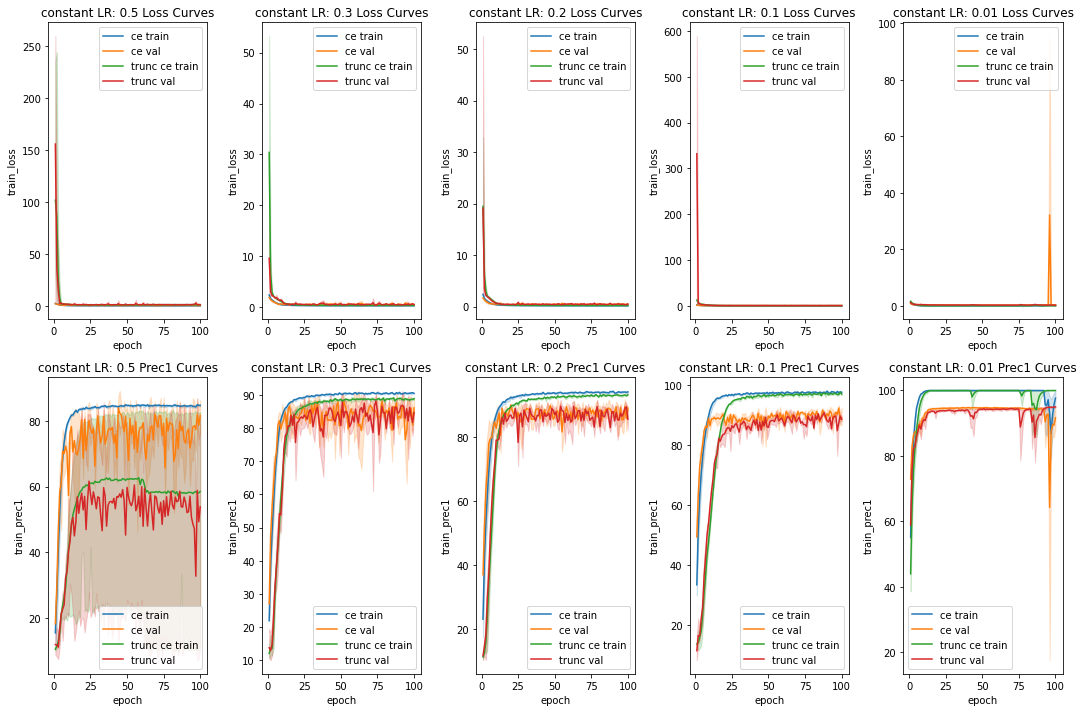

In [52]:
constant_ce_reader = CollectionReader(CE_CONSTANT_LR)
constant_trunc_reader = CollectionReader(TRUNC_CE_CONSTANT_LR)

constant_ce_logs, constant_trunc_logs = constant_ce_reader.df('logs'), constant_trunc_reader.df('logs')
constant_ce_metadata, constant_trunc_metadata = constant_ce_reader.df('metadata'), constant_trunc_reader.df('metadata')

plot(constant_ce_metadata, constant_ce_logs, constant_trunc_metadata, constant_trunc_logs, 'constant')

constant_ce_reader.close()
constant_trunc_reader.close()

100%|██████████| 15/15 [00:00<00:00, 42.62it/s]


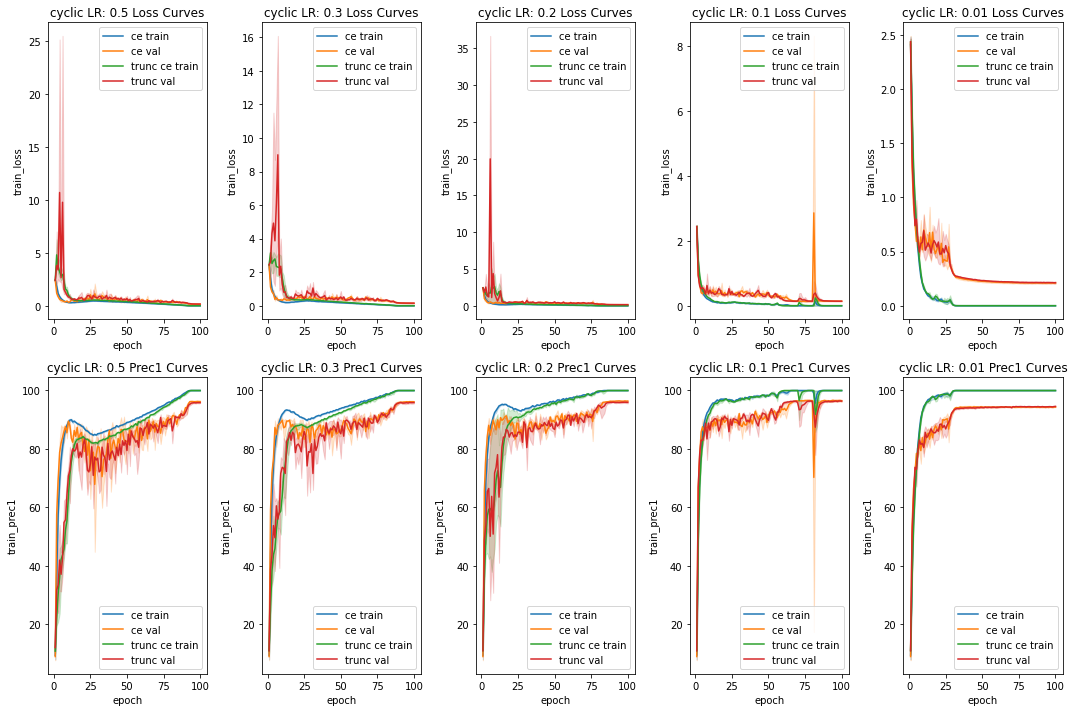

In [34]:
cyclic_ce_reader = CollectionReader(CE_CYCLIC)
cyclic_trunc_reader = CollectionReader(TRUNC_CE_CYCLIC)

cyclic_ce_logs, cyclic_trunc_logs = cyclic_ce_reader.df('logs'), cyclic_trunc_reader.df('logs')
cyclic_ce_metadata, cyclic_trunc_metadata = cyclic_ce_reader.df('metadata'), cyclic_trunc_reader.df('metadata')

plot(cyclic_ce_metadata, cyclic_ce_logs, cyclic_trunc_metadata, cyclic_trunc_logs, 'cyclic')

cyclic_ce_reader.close()
cyclic_trunc_reader.close()

100%|██████████| 15/15 [00:00<00:00, 42.94it/s]


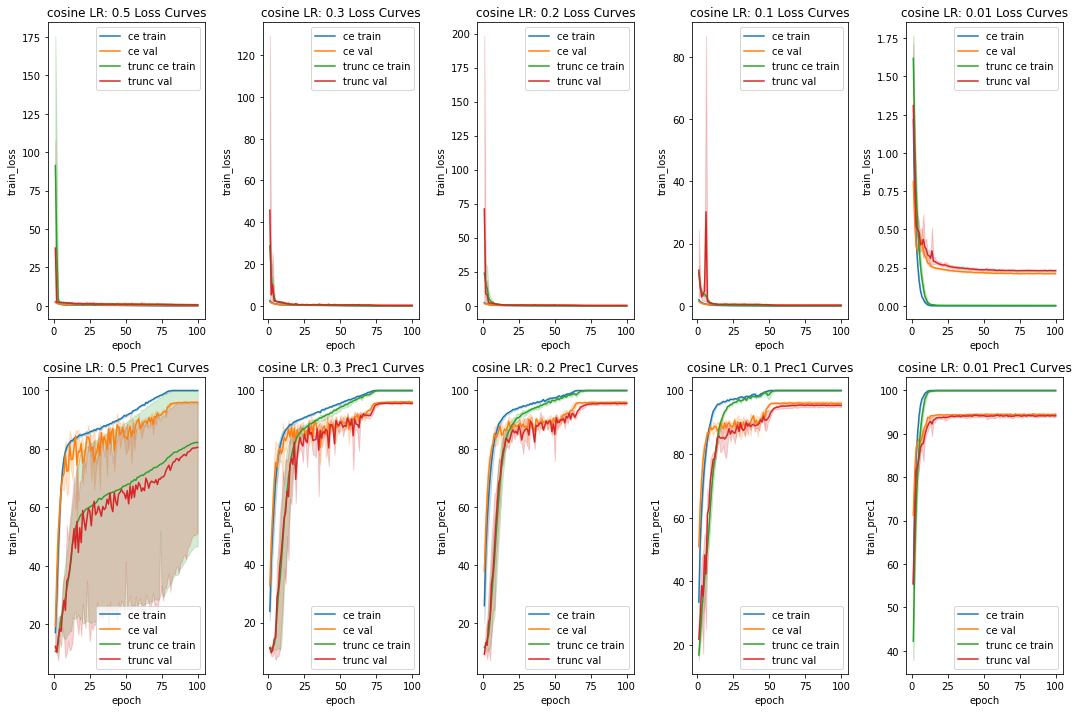

In [35]:
cosine_ce_reader = CollectionReader(CE_COSINE)
cosine_trunc_reader = CollectionReader(TRUNC_CE_COSINE)

cosine_ce_logs, cosine_trunc_logs = cosine_ce_reader.df('logs'), cosine_trunc_reader.df('logs')
cosine_ce_metadata, cosine_trunc_metadata = cosine_ce_reader.df('metadata'), cosine_trunc_reader.df('metadata')

plot(cosine_ce_metadata, cosine_ce_logs, cosine_trunc_metadata, cosine_trunc_logs, 'cosine')

cosine_ce_reader.close()
cosine_trunc_reader.close()

100%|██████████| 8/8 [00:00<00:00, 31.69it/s]


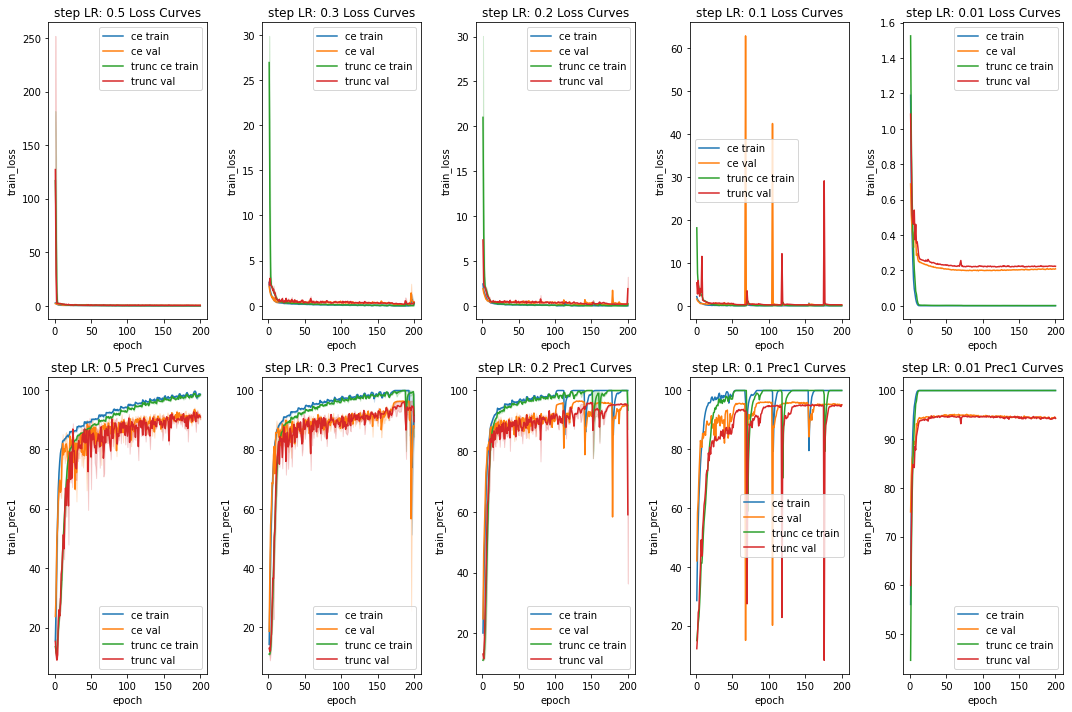

In [59]:
step_ce_reader = CollectionReader(CE_STEP_LR_REAL)
step_trunc_reader = CollectionReader(TRUNC_CE_STEP_LR_REAL)

step_ce_logs, step_trunc_logs = step_ce_reader.df('logs'), step_trunc_reader.df('logs')
step_ce_metadata, step_trunc_metadata = step_ce_reader.df('metadata'), step_trunc_reader.df('metadata')

plot(step_ce_metadata, step_ce_logs, step_trunc_metadata, step_trunc_logs, 'step')

step_ce_reader.close()
step_trunc_reader.close()

100%|██████████| 15/15 [00:00<00:00, 43.95it/s]


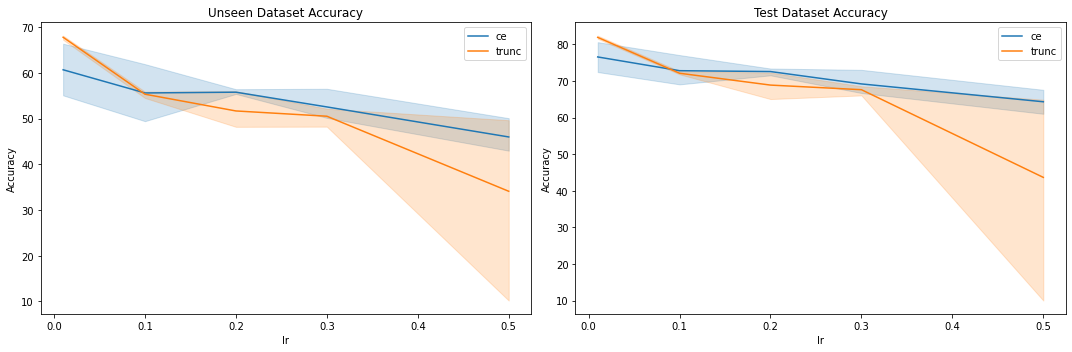

In [37]:
constant_ce_reader = CollectionReader(CE_CONSTANT_LR)
constant_trunc_reader = CollectionReader(TRUNC_CE_CONSTANT_LR)

constant_ce_unseen, constant_trunc_unseen = constant_ce_reader.df('unseen'), constant_trunc_reader.df('unseen')
constant_ce_test, constant_trunc_test = constant_ce_reader.df('test'), constant_trunc_reader.df('test')
constant_ce_metadata, constant_trunc_metadata = constant_ce_reader.df('metadata'), constant_trunc_reader.df('metadata')

plot_(constant_ce_unseen, constant_trunc_unseen, constant_ce_test, constant_trunc_test, constant_ce_metadata, constant_trunc_metadata)

constant_ce_reader.close()
constant_trunc_reader.close()

100%|██████████| 15/15 [00:00<00:00, 36.17it/s]


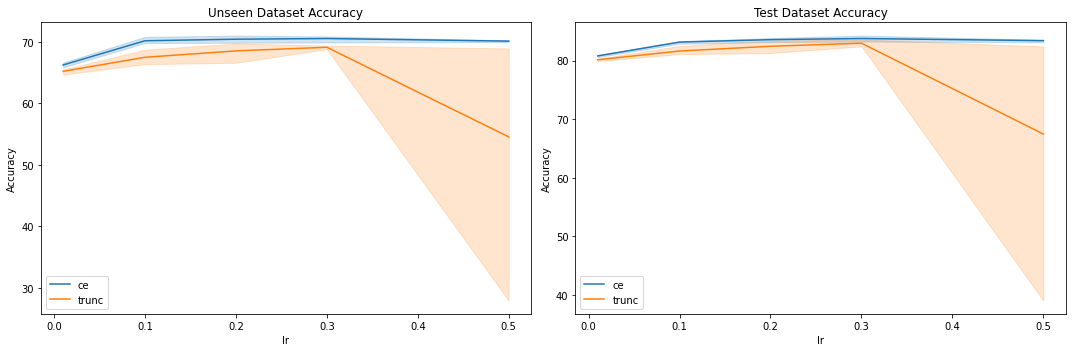

In [38]:
cosine_ce_reader = CollectionReader(CE_COSINE)
cosine_trunc_reader = CollectionReader(TRUNC_CE_COSINE)

cosine_ce_unseen, cosine_trunc_unseen = cosine_ce_reader.df('unseen'), cosine_trunc_reader.df('unseen')
cosine_ce_test, cosine_trunc_test = cosine_ce_reader.df('test'), cosine_trunc_reader.df('test')
cosine_ce_metadata, cosine_trunc_metadata = cosine_ce_reader.df('metadata'), cosine_trunc_reader.df('metadata')

plot_(cosine_ce_unseen, cosine_trunc_unseen, cosine_ce_test, cosine_trunc_test, cosine_ce_metadata, cosine_trunc_metadata)

cosine_ce_reader.close()
cosine_trunc_reader.close()

100%|██████████| 8/8 [00:00<00:00, 44.69it/s]


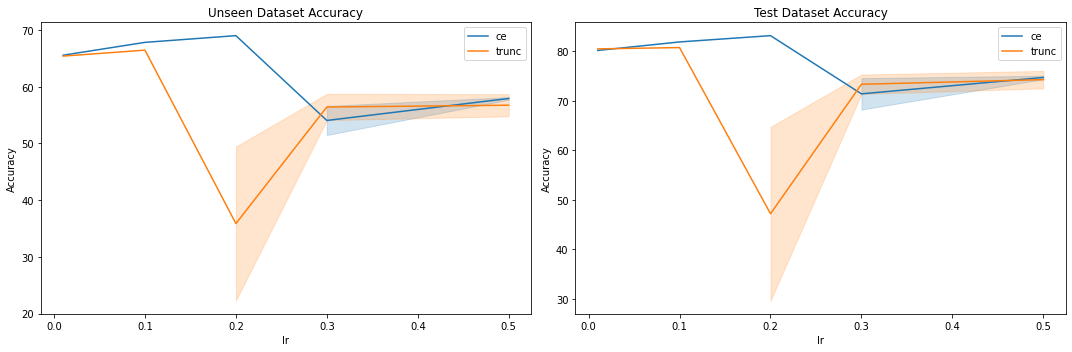

In [60]:
step_ce_reader = CollectionReader(CE_STEP_LR_REAL)
step_trunc_reader = CollectionReader(TRUNC_CE_STEP_LR_REAL)

step_ce_unseen, step_trunc_unseen = step_ce_reader.df('unseen'), step_trunc_reader.df('unseen')
step_ce_test, step_trunc_test = step_ce_reader.df('test'), step_trunc_reader.df('test')
step_ce_metadata, step_trunc_metadata = step_ce_reader.df('metadata'), step_trunc_reader.df('metadata')

plot_(step_ce_unseen, step_trunc_unseen, step_ce_test, step_trunc_test, step_ce_metadata, step_trunc_metadata)

step_ce_reader.close()
step_trunc_reader.close()

100%|██████████| 15/15 [00:00<00:00, 41.37it/s]


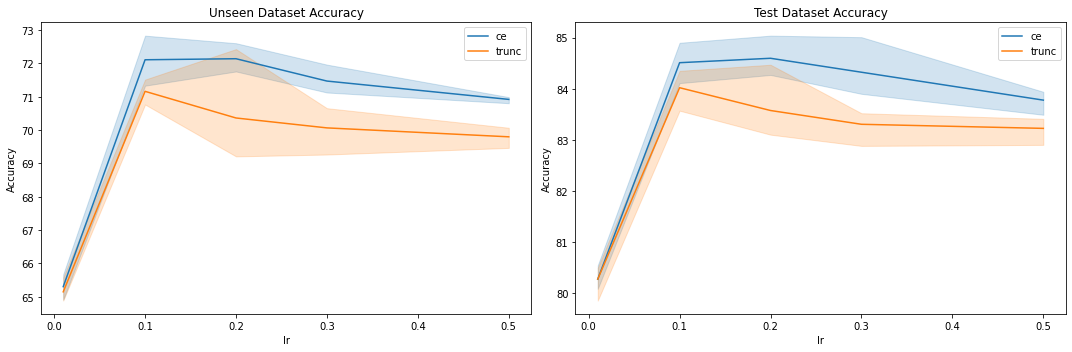

In [40]:
cyclic_ce_reader = CollectionReader(CE_CYCLIC)
cyclic_trunc_reader = CollectionReader(TRUNC_CE_CYCLIC)

cyclic_ce_unseen, cyclic_trunc_unseen = cyclic_ce_reader.df('unseen'), cyclic_trunc_reader.df('unseen')
cyclic_ce_test, cyclic_trunc_test = cyclic_ce_reader.df('test'), cyclic_trunc_reader.df('test')
cyclic_ce_metadata, cyclic_trunc_metadata = cyclic_ce_reader.df('metadata'), cyclic_trunc_reader.df('metadata')

plot_(cyclic_ce_unseen, cyclic_trunc_unseen, cyclic_ce_test, cyclic_trunc_test, cyclic_ce_metadata, cyclic_trunc_metadata)

cyclic_ce_reader.close()
cyclic_trunc_reader.close()